In [137]:
from pathlib import Path

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

## Konfigurieren von Variablen

In [138]:
img_dir = Path("../../data/images")

# Histogramm eines Grauwertbildes
Hier wird die Matplotlib-Funktion hist (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) und Numpy ravel (https://numpy.org/doc/stable/reference/generated/numpy.ravel.html) verwendet.

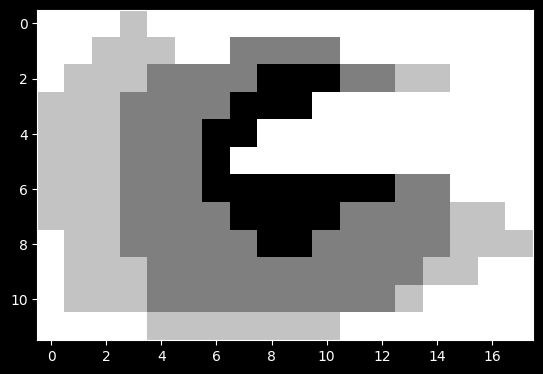

In [139]:
img = cv.imread(str(img_dir / 'raw_gray.png'), cv.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.show()

In [140]:
# ToDo: Schreiben Sie hier eine Funktion histogram(img), die das Histogramm + normierte Histogramm des Grauwertbildes zurückgibt
def histogram(img):
    hist = [0] * 256
    norm_hist = [0.0] * 256
    
    # calculate height and width of image
    height, width = img.shape
    
    # calculate histogram of img by iterating over all pixels
    for row in img:
        for pixel in row:
            if hist[pixel] is None:
                hist[pixel] = 1
                norm_hist[pixel] = 1 / (height * width)
            else:
                hist[pixel] += 1
                norm_hist[pixel] += 1 / (height * width)
    
    return hist, norm_hist

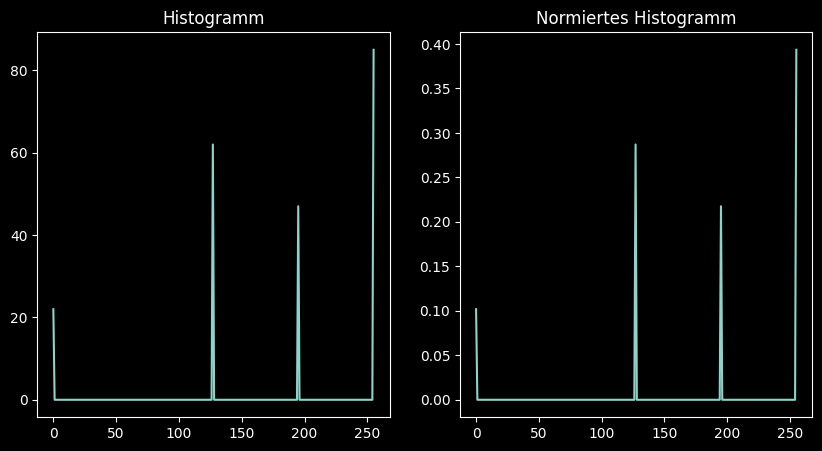

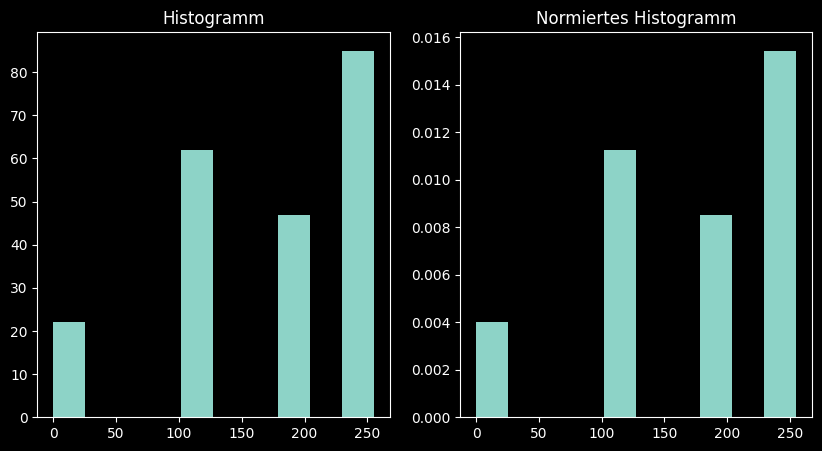

In [141]:
# Ausführung der geschriebenen Funktion
hist, norm_hist = histogram(img)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(hist)
plt.title('Histogramm')
plt.subplot(1, 2, 2)
plt.plot(norm_hist)
plt.title('Normiertes Histogramm')
plt.show()

# Vergleich mit implementierter Histogramm Funktion
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(img.ravel(), density=False)
plt.title('Histogramm')
plt.subplot(1, 2, 2)
plt.hist(img.ravel(), density=True)
plt.title('Normiertes Histogramm')
plt.show()

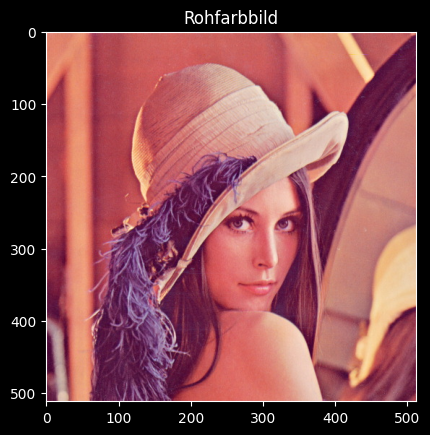

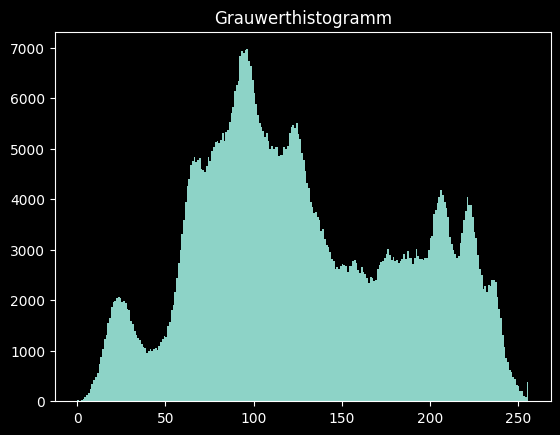

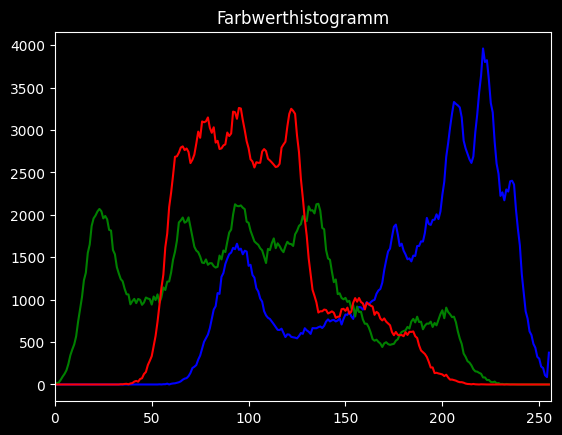

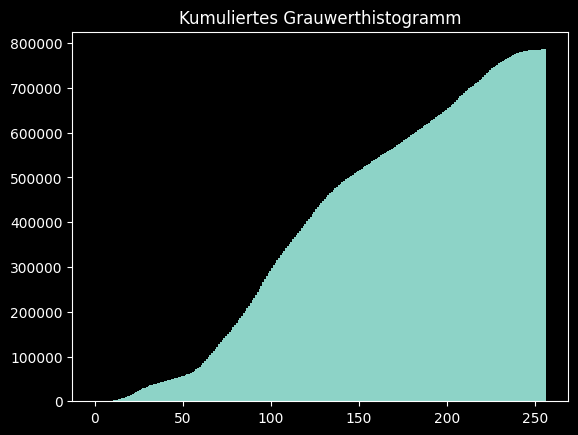

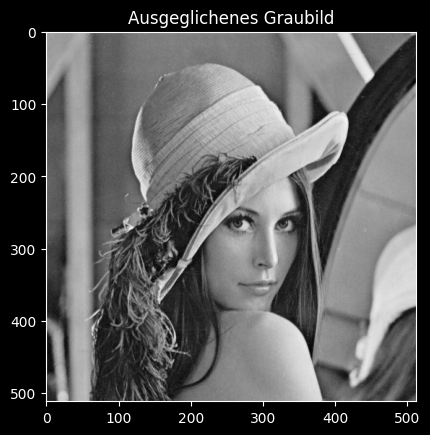

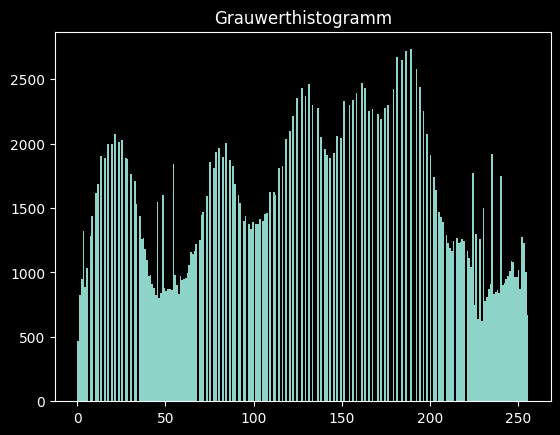

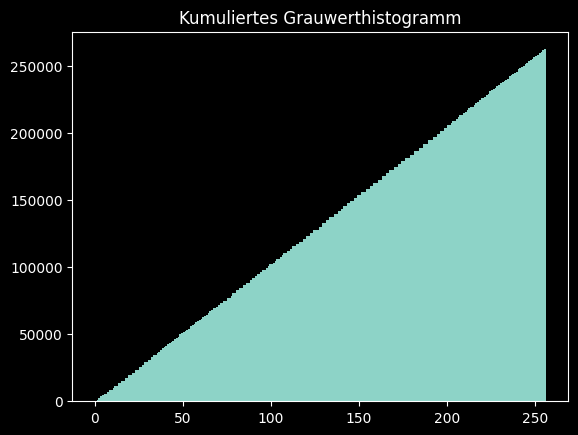

In [142]:
img_lena = cv.imread(str(img_dir / 'lena.jpg'), -1)
img_lena = cv.cvtColor(img_lena, cv.COLOR_BGR2RGB)
plt.figure()
plt.title('Rohfarbbild')
plt.imshow(img_lena)

plt.figure()
plt.title('Grauwerthistogramm')
plt.hist(img_lena.ravel(),256,(0,256))
plt.show()

# erstelle Farbwerthistogramm über R-, G- und B-Kanal
color = ('b','g','r')
plt.figure()
for i,col in enumerate(color):
    histr = cv.calcHist([img_lena],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Farbwerthistogramm')
plt.show()

# erstelle kumuliertes (=aufsummiertes) Histogramm
plt.figure()
plt.title('Kumuliertes Grauwerthistogramm')
plt.hist(img_lena.ravel(),256,(0,256),cumulative=True)
plt.show()

# führe Histogrammausgleich durch
img_lena_gray = cv.cvtColor(img_lena, cv.COLOR_RGB2GRAY)
img_lena_eq = cv.equalizeHist(img_lena_gray)

plt.figure()
plt.title('Ausgeglichenes Graubild')
plt.imshow(img_lena_gray, cmap='gray')

plt.figure()
plt.title('Grauwerthistogramm')
plt.hist(img_lena_eq.ravel(),256,(0,256))
plt.show()

plt.figure()
plt.title('Kumuliertes Grauwerthistogramm')
plt.hist(img_lena_eq.ravel(),256,(0,256),cumulative=True)
plt.show()

# Histogramm-Ausgleich

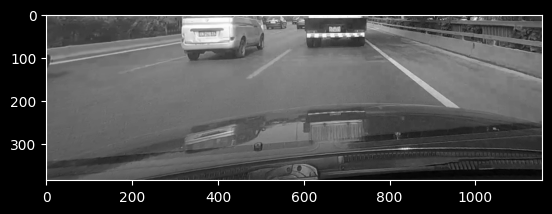

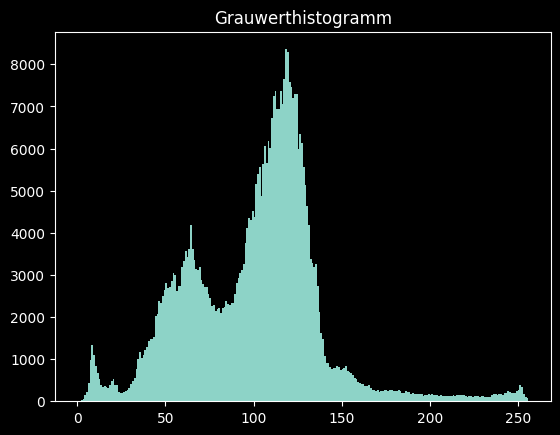

In [143]:
plt.figure()
img_lane = cv.imread(str(img_dir / 'uclanes_ex.jpg'), cv.IMREAD_GRAYSCALE)
plt.imshow(img_lane, cmap='gray')

plt.figure()
plt.title('Grauwerthistogramm')
plt.hist(img_lane.ravel(),256,(0,256))
plt.show()

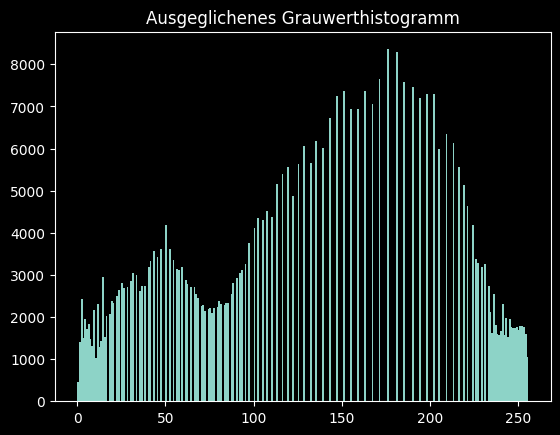

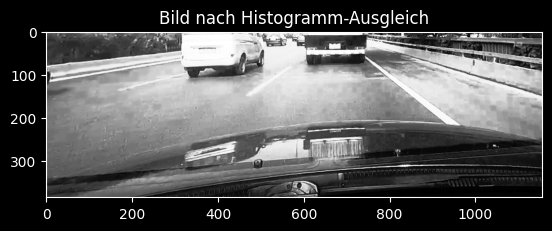

In [144]:
# führe Histogrammausgleich durch
img_lane_eq = cv.equalizeHist(img_lane)

plt.figure()
plt.title('Ausgeglichenes Grauwerthistogramm')
plt.hist(img_lane_eq.ravel(),256,(0,256)); plt.show()

plt.figure()
plt.title('Bild nach Histogramm-Ausgleich')
plt.imshow(img_lane_eq, cmap='gray')
plt.show()

# Punktoperatoren: Lineare Skalierung

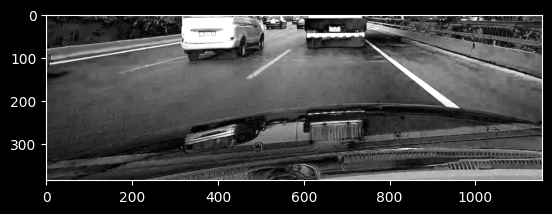

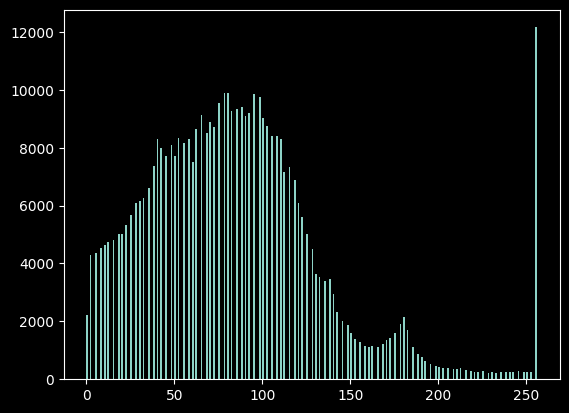

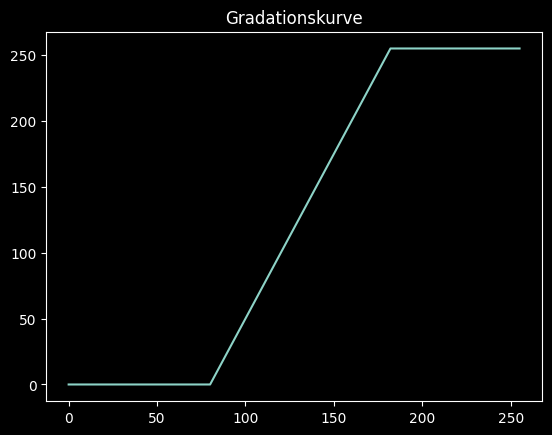

In [145]:
# Helligkeits- und Kontrastanpassung
# ToDo: Schreiben Sie eine Funktion scale_img(img), 
# die die Pixel des Eingangsbildes skaliert und mit einem Bias versieht:
# f*(x,y) = alpha * f(x,y) + beta
def scale_img(img, alpha, beta): 
    new_img = []
    return new_img

# Beispiel: 
# alpha < 1 --> reduziert Kontrast
# beta = 200 erhöht Helligkeit
alpha = 2.5
beta = -200
new_lane = []
new_lane = cv.convertScaleAbs(img_lane, alpha=alpha, beta=beta)
x = np.linspace(0,255,256)
y = alpha * x + beta
y = np.clip(y, 0, 255)

plt.figure()
plt.imshow(new_lane, cmap='gray', vmin=0, vmax=255)
plt.show()

plt.figure()
plt.hist(new_lane.ravel(),256,(0,256))
plt.show()

plt.figure()
plt.plot(x,y)
plt.title('Gradationskurve')
plt.show()

# Punktoperatoren: Logarithmische Skalierung und Gamma-Korrektur

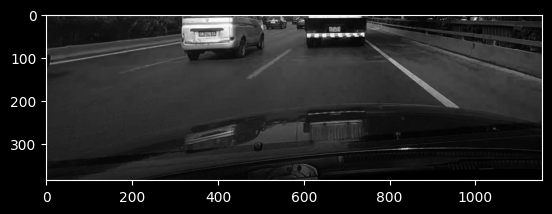

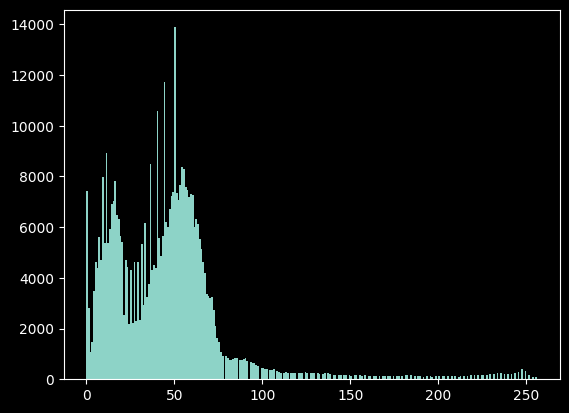

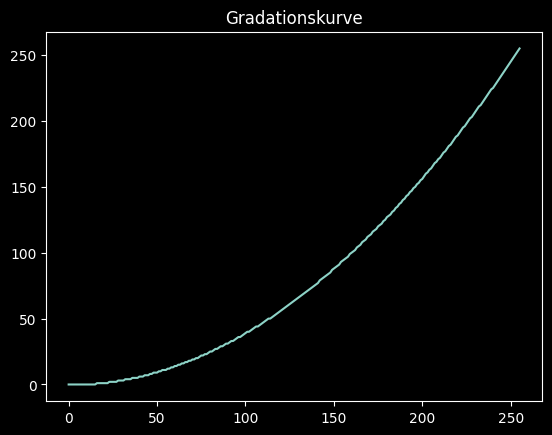

In [146]:
# Gamma-Korrektur

# Beispiel: 
gamma = 2

# Erstelle Look-Up-Table
lookUpTable = np.empty((1,256), np.uint8)
for i in range(256):
    lookUpTable[0,i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)

# Wende Loop-up-table an
new_lane = cv.LUT(img_lane, lookUpTable)

# verteile 256 Werte von 0 bis 255 
x = np.linspace(0,255,256)

plt.figure()
plt.imshow(new_lane, cmap='gray', vmin=0, vmax=255)
plt.show()

plt.figure()
plt.hist(new_lane.ravel(),256,(0,256))
plt.show()

plt.figure()
plt.plot(x,lookUpTable[0,:])
plt.title('Gradationskurve')
plt.show()

# Thresholding

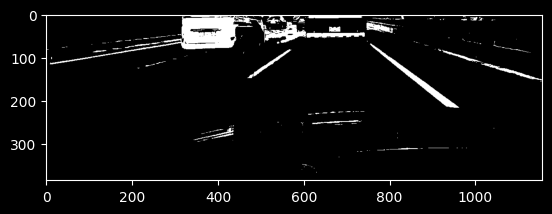

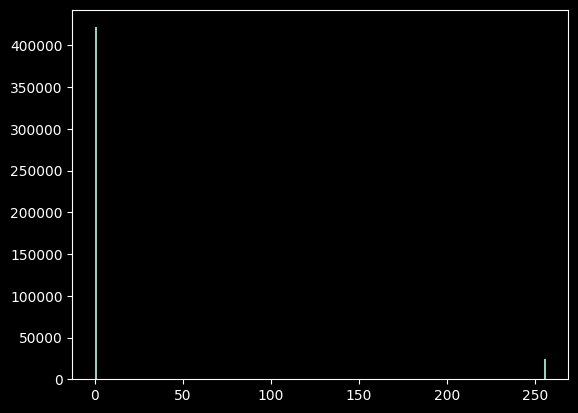

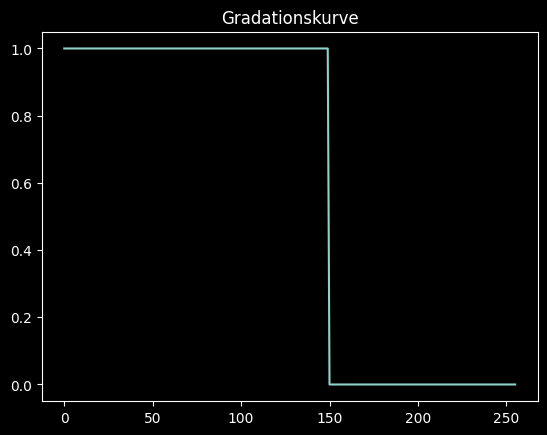

False

In [147]:
# Beispiel: 
thresh = 150

# wende Threshold an
ret, new_lane = cv.threshold(img_lane, thresh=thresh, maxval=255, type=cv.THRESH_BINARY)

x = np.linspace(0,255,256)
y = (x < thresh)

plt.figure()
plt.imshow(new_lane, cmap='gray', vmin=0, vmax=255)
plt.show()

plt.figure()
plt.hist(new_lane.ravel(),256,(0,256))
plt.show()

plt.figure()
plt.plot(x,y)
plt.title('Gradationskurve')
plt.show()

cv.imwrite('./img/lanes_threshold.jpg', new_lane)

# Grauwert-Slicing
Beim Grauwert-Slicing wird versucht, das ursprüngliche Graubild durch wenige repräsentative Grauwerte abzubilden. Um repräsentative Grauwerte zu finden, wird das Histogramm betrachtet.

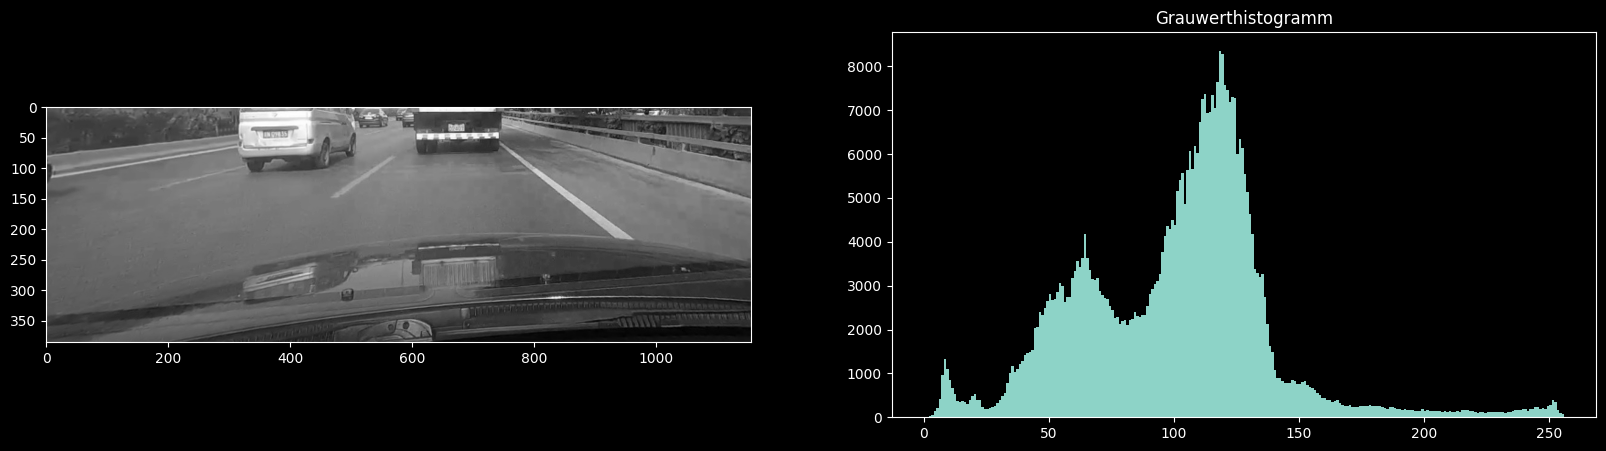

In [148]:
# zeige Originalbild und Histogramm
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.imshow(img_lane, cmap='gray')
plt.subplot(1,2,2)
plt.title('Grauwerthistogramm')
plt.hist(img_lane.ravel(),256,(0,256))
plt.show()

Es zeigen sich folgende Wertebereiche: 
- 0 - 24 --> 0
- 25 - 80 --> 85
- 80 - 170 --> 170
- 171 - 255 --> 255

Diese werden im Gray-Level-Slicing entsprechend zusammengefasst

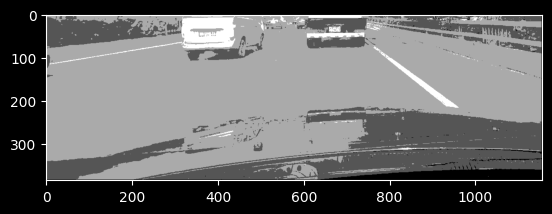

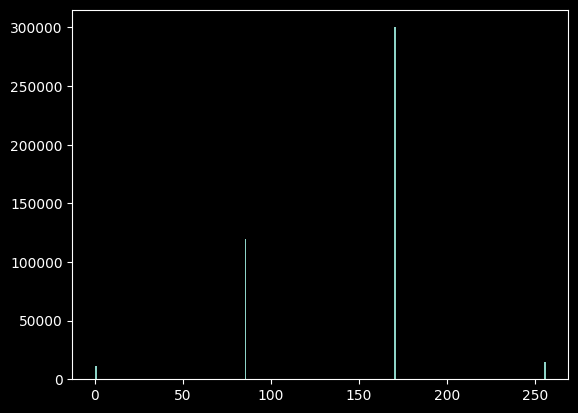

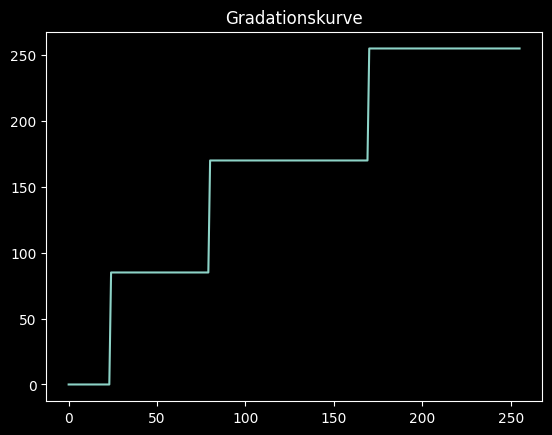

In [149]:
thresh1 = 24
thresh2 = 80 
thresh3 = 170

w = len(img_lane[0])
h = len(img_lane)

# erstelle leeres Bild
img_sliced = np.zeros((h,w), dtype = int)

# iteriere über die Pixel und weise sie den einzelnen Thresholds zu
for i in range(h-1):      
    for j in range(w-1):  
        if img_lane[i,j] <= thresh1: 
            img_sliced[i,j] = 0
        elif thresh1 < img_lane[i,j] <= thresh2: 
            img_sliced[i,j] = 85
        elif thresh2 < img_lane[i,j] <= thresh3: 
            img_sliced[i,j] = 170
        else:
            img_sliced[i,j] = 255            

# berechne Gradationskurve
x = np.linspace(0,255,256)
y = np.zeros(256)
y[0:thresh1] = 0
y[thresh1:thresh2] = 85
y[thresh2:thresh3] = 170
y[thresh3:] = 255
            
plt.figure()
plt.imshow(img_sliced, cmap='gray', vmin=0, vmax=255)
plt.show()

plt.figure()
plt.hist(img_sliced.ravel(),256,(0,256))
plt.show()

plt.figure()
plt.plot(x,y)
plt.title('Gradationskurve')
plt.show()

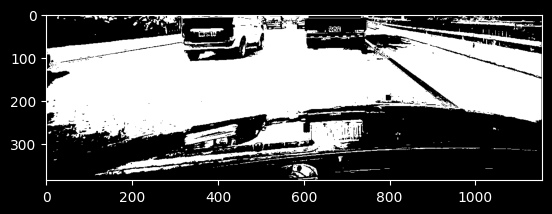

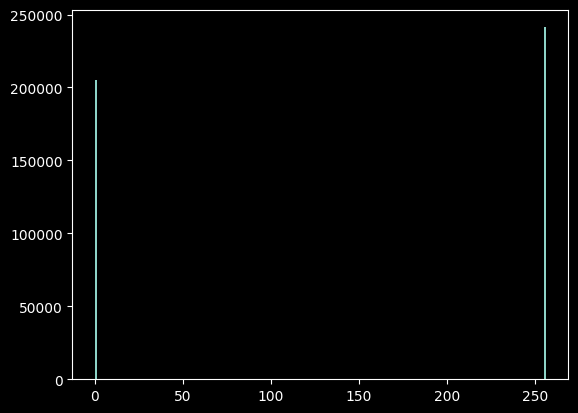

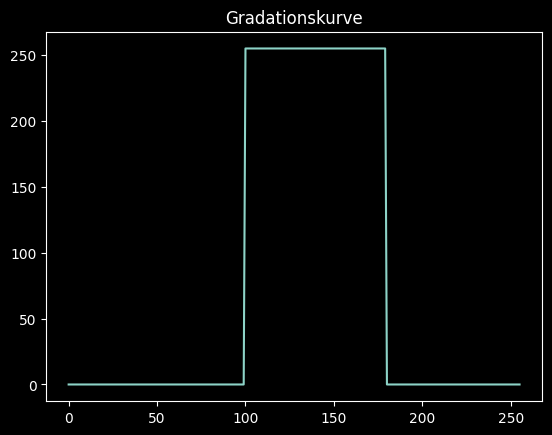

In [150]:
# Anpassung: Mapping der Signale auf 0 und 255

thresh1 = 100
thresh2 = 180 

w = len(img_lane[0])
h = len(img_lane)

# erstelle leeres Bild
img_sliced = np.zeros((h,w), dtype = int)
   
for i in range(h-1):      
    for j in range(w-1):          
        if thresh1 < img_lane[i,j] < thresh2: 
            img_sliced[i,j]= 255
        else:
            img_sliced[i,j] = 0

x = np.linspace(0,255,256)
y = np.zeros(256)
y[0:thresh1] = 0
y[thresh2:-1] = 0
y[thresh1:thresh2] = 255
            
plt.figure()
plt.imshow(img_sliced, cmap='gray', vmin=0, vmax=255)
plt.show()

plt.figure()
plt.hist(img_sliced.ravel(),256,(0,256))
plt.show()

plt.figure()
plt.plot(x,y)
plt.title('Gradationskurve')
plt.show()

# Logarithmische Skalierung

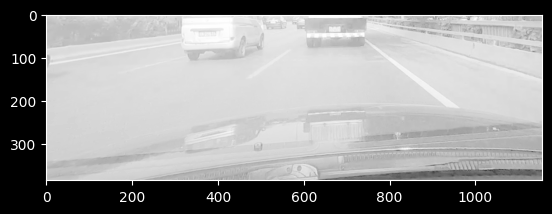

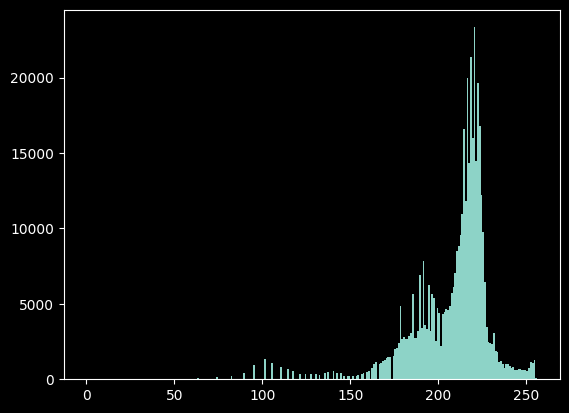

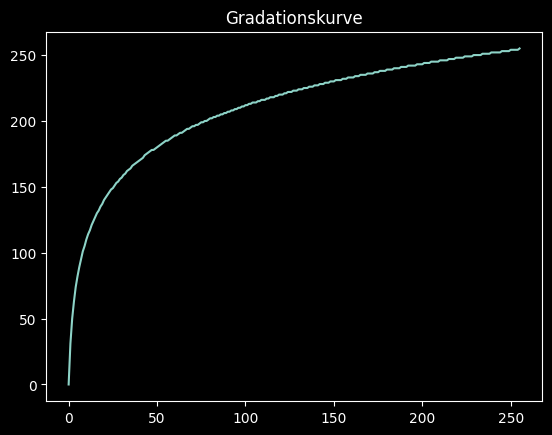

In [151]:
# Gamma-Korrektur

# Beispiel: 
c = 255 / (np.log(np.add(1, np.max(img_lane))))

# erstelle Look-up-Table
lookUpTable = np.empty((1,256), np.uint8)
for i in range(256):
    lookUpTable[0,i] = np.clip(c * np.log(1+i), 0, 255)

# wende Look-up-table an
new_lane = cv.LUT(img_lane, lookUpTable)

x = np.linspace(0,255,256)

plt.figure()
plt.imshow(new_lane, cmap='gray', vmin=0, vmax=255)
plt.show()

plt.figure()
plt.hist(new_lane.ravel(),256,(0,256))
plt.show()

plt.figure()
plt.plot(x,lookUpTable[0,:])
plt.title('Gradationskurve')
plt.show()

# Negativ

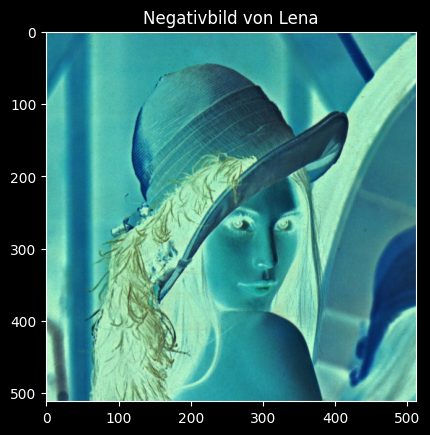

In [152]:
# erstelle das Negativ eines Bildes
img_lena_neg = cv.bitwise_not(img_lena)
plt.imshow(img_lena_neg)
plt.title('Negativbild von Lena')
plt.show()

# Aufgabe: Können Sie die versteckte Botschaft entschlüsseln?

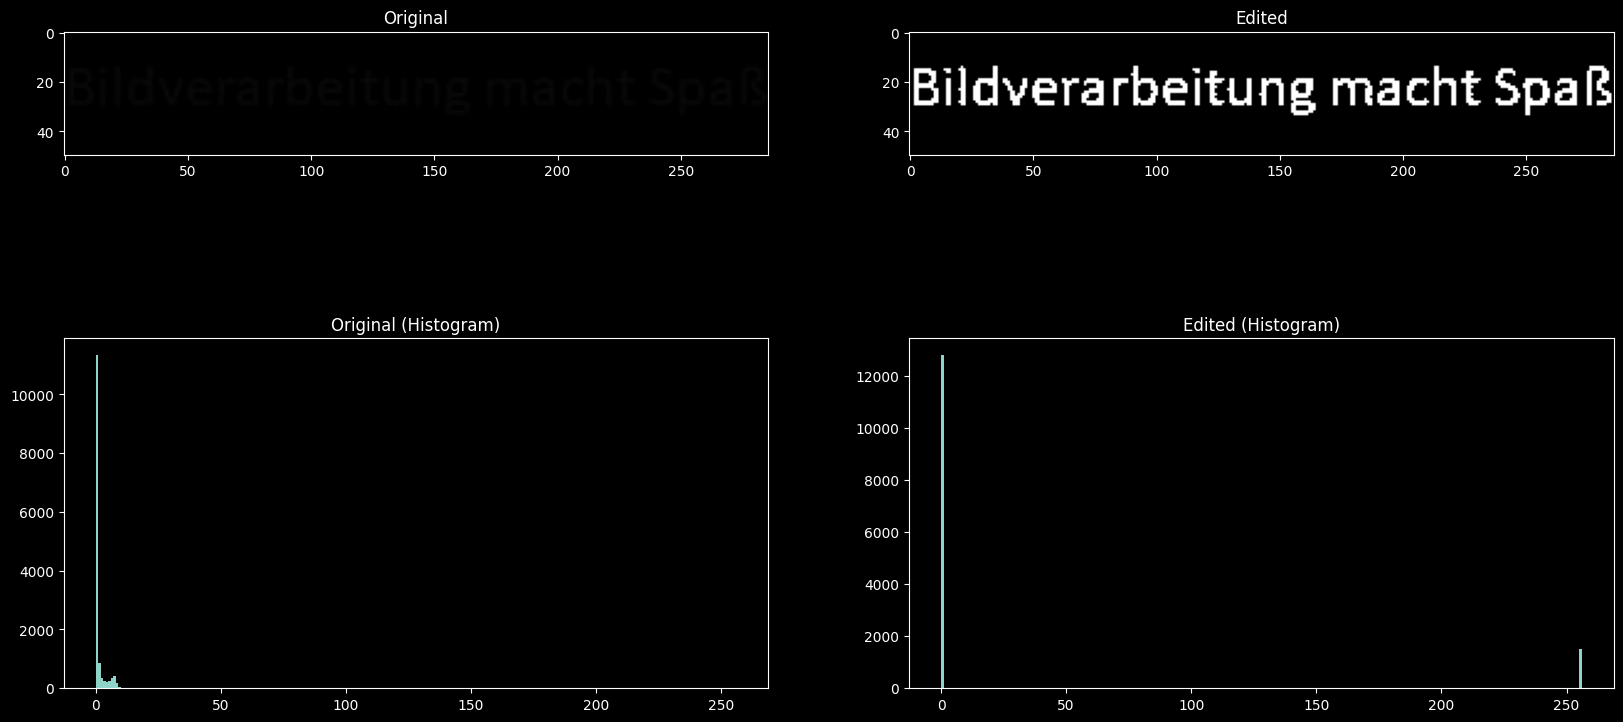

In [153]:
# lade Bild und stelle es dar
thresh = 3
img = cv.imread(str(img_dir / 'versteckt.jpg'), cv.IMREAD_GRAYSCALE)

# wende Threshold an
ret, new_lane = cv.threshold(img, thresh=thresh, maxval=255, type=cv.THRESH_BINARY)

plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title("Original")
plt.subplot(2,2,2)
plt.imshow(new_lane, cmap='gray', vmin=0, vmax=255)
plt.title("Edited")
plt.subplot(2,2,3)
plt.hist(img.ravel(),256,(0,256))
plt.title("Original (Histogram)")
plt.subplot(2,2,4)
plt.hist(new_lane.ravel(),256,(0,256))
plt.title("Edited (Histogram)")
plt.show()

## Aufgabe: Heben Sie auf folgenden Bildern die Linienmarkierungen hervor.

In [154]:
thresh1 = 145
thresh2 = 215

img_lane1 = cv.imread(str(img_dir / 'uclanes_ex.jpg'), -1)
img_lane1_gray = cv.cvtColor(img_lane1, cv.COLOR_RGB2GRAY)
img_lane2 = cv.imread(str(img_dir / 'image001.jpg'), -1)
img_lane2_rgb = cv.cvtColor(img_lane2, cv.COLOR_BGR2RGB)
img_lane2_hsv = cv.cvtColor(img_lane2, cv.COLOR_BGR2HSV)

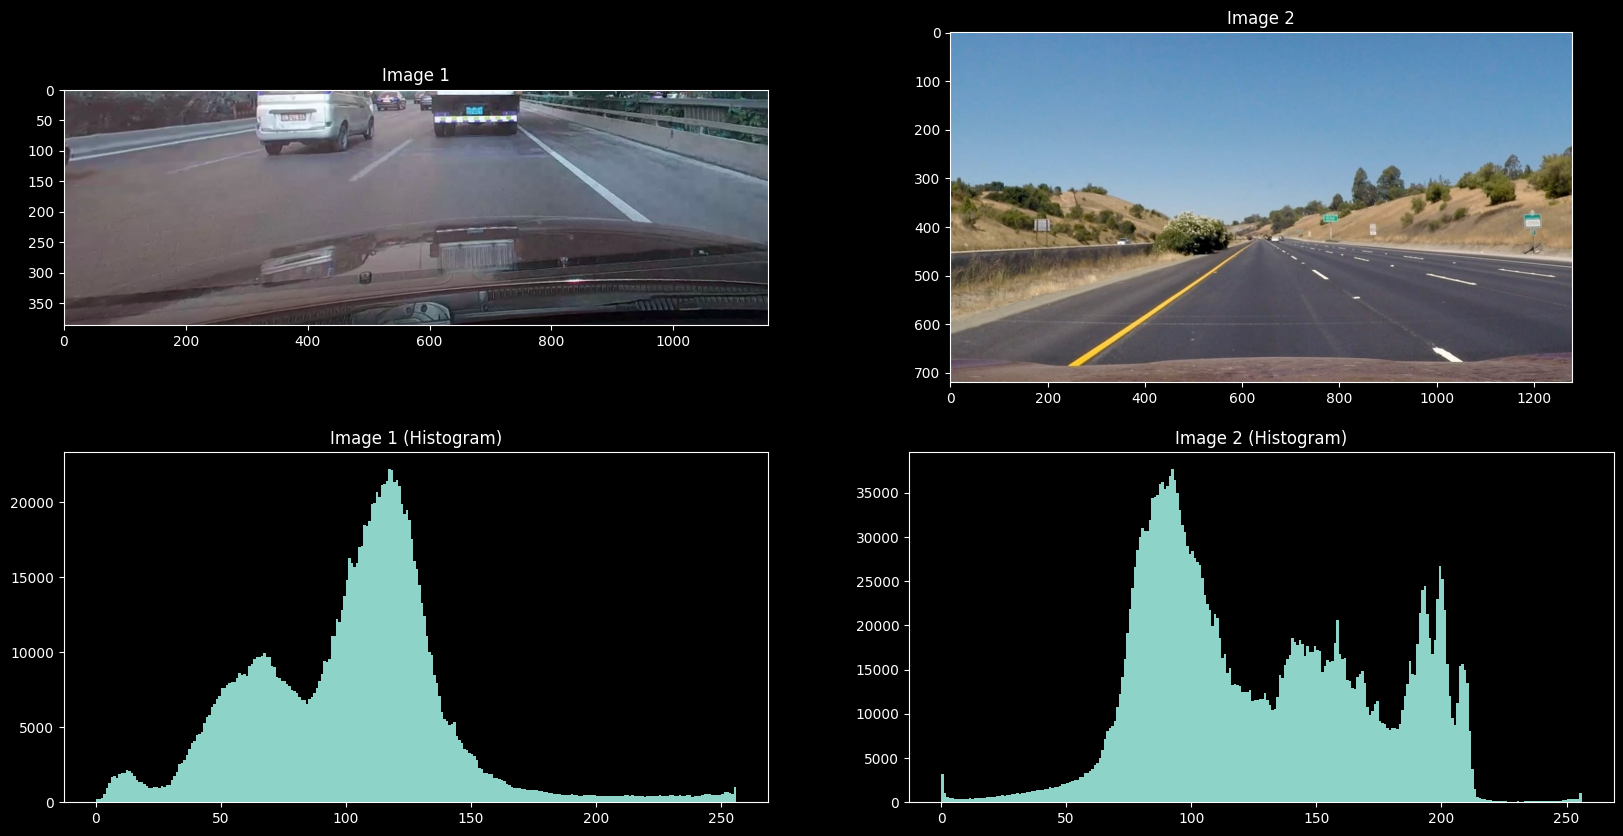

In [155]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.imshow(img_lane1)
plt.title("Image 1")
plt.subplot(2,2,2)
plt.imshow(img_lane2_rgb)
plt.title("Image 2")
plt.subplot(2,2,3)
plt.hist(img_lane1.ravel(),256,(0,256))
plt.title("Image 1 (Histogram)")
plt.subplot(2,2,4)
plt.hist(img_lane2_rgb.ravel(),256,(0,256))
plt.title("Image 2 (Histogram)")
plt.show()

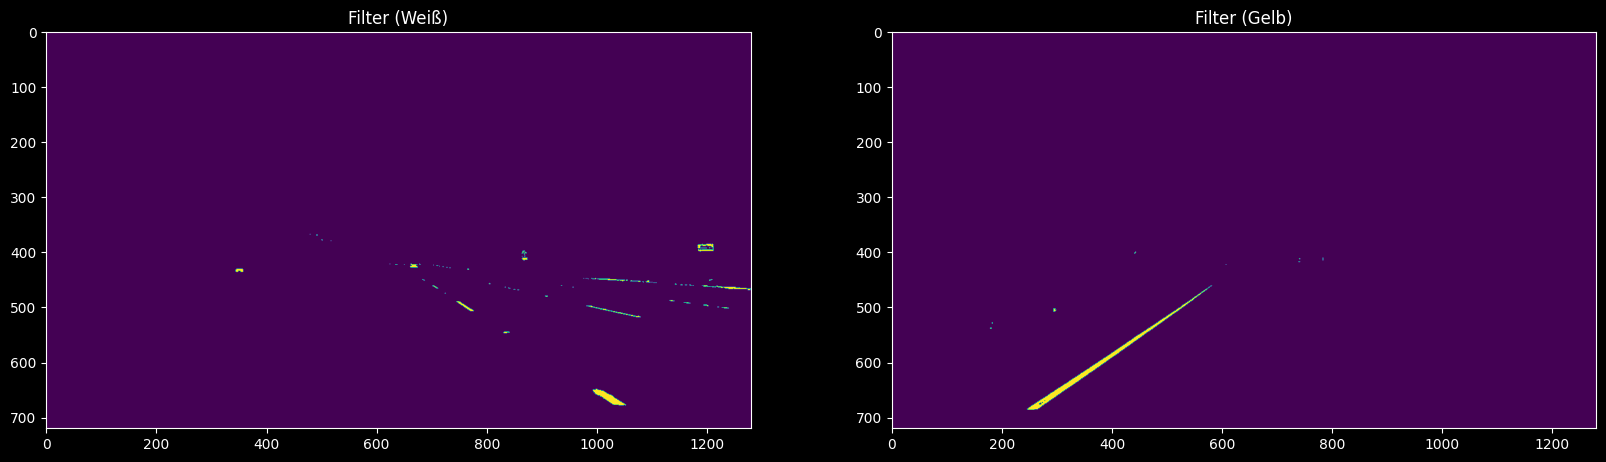

In [156]:
img_filter_white = cv.inRange(img_lane2_hsv, np.array([0, 0, 215]), np.array([179, 35, 255]))
img_filter_yellow = cv.inRange(img_lane2_hsv, np.array([15, 50, 225]), np.array([35, 225, 255]))
mask = cv.bitwise_or(img_filter_white, img_filter_yellow)
# target = cv.bitwise_and(img_lane2_rgb, img_lane2_rgb, mask=mask)
img_lane2_hsv[mask != 0] = (255, 255, 255)
img_lane2_gray = cv.cvtColor(img_lane2_hsv, cv.COLOR_RGB2GRAY)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(img_filter_white)
plt.title("Filter (Weiß)")
plt.subplot(1,2,2)
plt.imshow(img_filter_yellow)
plt.title("Filter (Gelb)")
plt.show()

ret, new_lane1 = cv.threshold(img_lane1_gray, thresh=thresh1, maxval=255, type=cv.THRESH_BINARY)
ret, new_lane2 = cv.threshold(img_lane2_gray, thresh=thresh2, maxval=255, type=cv.THRESH_BINARY)

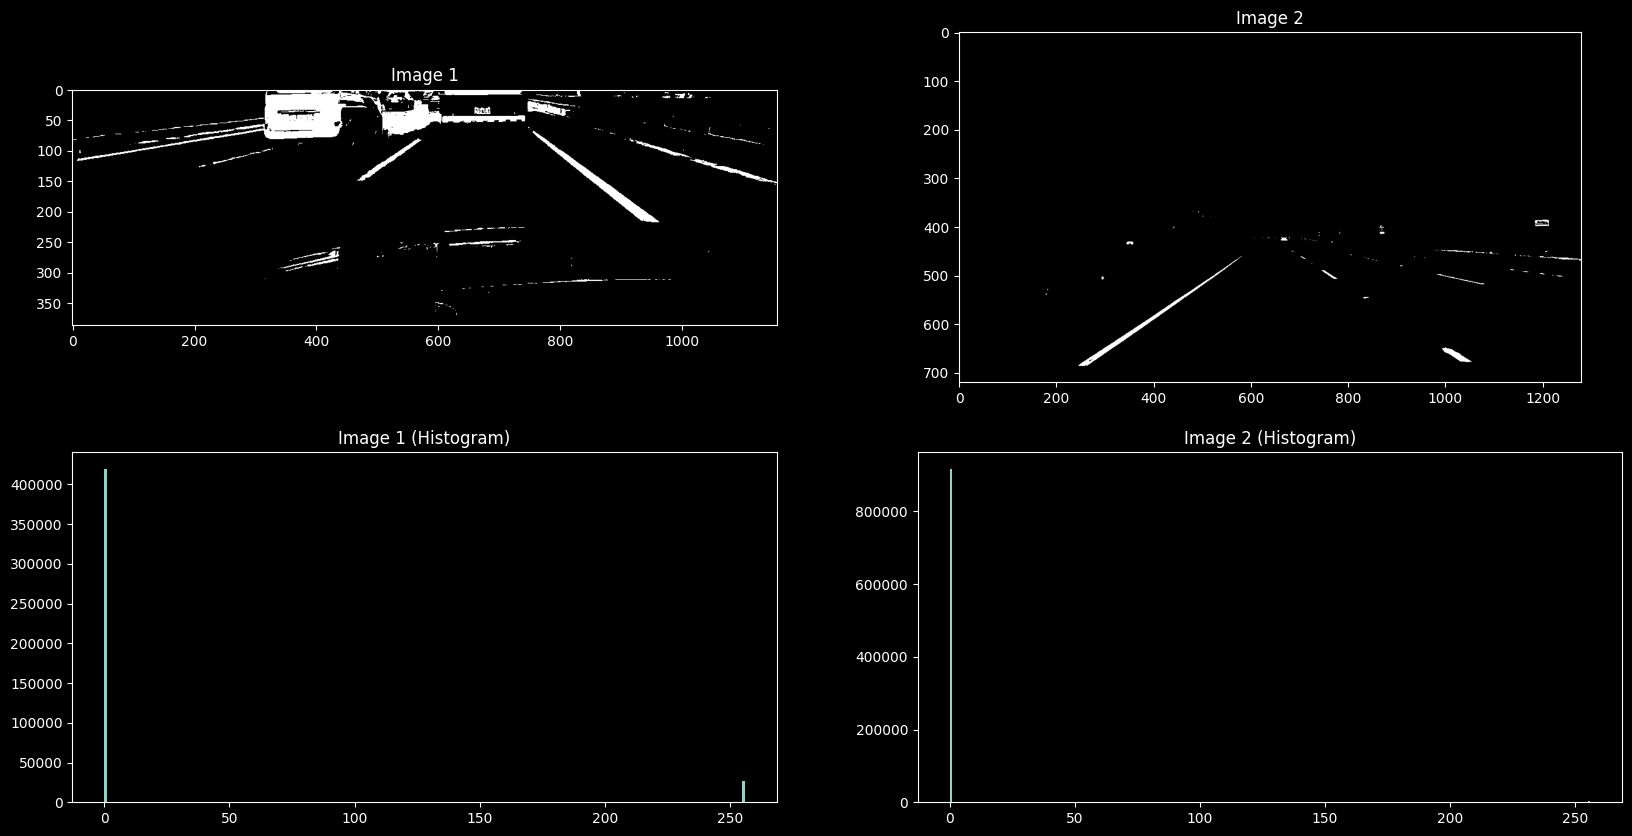

In [157]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.imshow(new_lane1, cmap='gray', vmin=0, vmax=255)
plt.title("Image 1")
plt.subplot(2,2,2)
plt.imshow(new_lane2, cmap='gray', vmin=0, vmax=255)
plt.title("Image 2")
plt.subplot(2,2,3)
plt.hist(new_lane1.ravel(),256,(0,256))
plt.title("Image 1 (Histogram)")
plt.subplot(2,2,4)
plt.hist(new_lane2.ravel(),256,(0,256))
plt.title("Image 2 (Histogram)")
plt.show()